# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function

In [2]:
# Define the function f(x) and its gradient
def f(x):
    return x**2

def grad_f(x):
    return 2*x

# Example

## Step size too large:

In [3]:
x = -1.5

t = 1.0

alpha_2 = 0.5

fval = f(x)

dfval = grad_f(x)

fval_new = f(x - t*dfval)

if fval_new > fval - alpha_2*t*dfval**2:
    print('Step size too large')

Step size too large


### Checking condition

Let `fval_new` be $f(x - t(\nabla_{x}f)(x))$. We see that $f(x - t\cdot(\nabla_{x}f)(x)) > f(x) - \alpha\cdot{t}\cdot(\nabla_{x}f)(x)$, meaning the step size is too large.

In [4]:
fval_new

2.25

In [5]:
fval - alpha_2*t*dfval**2

-2.25

In [6]:
def check_backtracking_condition(t, alpha_2, x, f, df):
    gx = df(x)
    x_new = x - t * gx
    LHS = f(x_new)
    RHS = f(x) - alpha_2 * t * gx ** 2
    if LHS <= RHS:
        print(f'Backtracking terminated.\nLHS = {LHS:.4f}; RHS = {RHS:.4f}.')
    else:
        print(f'Backtracking not terminated.\nLHS = {LHS:.4f}; RHS = {RHS:.4f}.')
    pass

In [7]:
check_backtracking_condition(t, alpha_2, x, f, grad_f)

Backtracking not terminated.
LHS = 2.2500; RHS = -2.2500.


## Step size small enough

In [8]:
x = -1.5

t = .1

alpha_2 = 0.5

fval = f(x)

dfval = grad_f(x)

fval_new = f(x - t*dfval)

if fval_new > fval - alpha_2*t*dfval**2:
    print('Step size too large')
else:
    print('Step size is small enough')

Step size is small enough


In [9]:
check_backtracking_condition(t, alpha_2, x, f, grad_f)

Backtracking terminated.
LHS = 1.4400; RHS = 1.8000.


# Plot backtracking line search iterations

Here we do an example of one application of backtracking line search. Note this is performed before each gradient descent update.

### Do line search

Note that we gather all the results in lists only for plotting purposes. Generally we will only store the previous value of $t$.

In [10]:
x = -1.5
t = 1.0

alpha_1 = 0.8
alpha_2 = 0.5

fval = f(x)
dfval = grad_f(x)
fval_new = f(x - t*dfval)

tvals = []
fvals = [] # Used to store the LHS of the inequality
xvals = []
reductions = [] # Used to store the RHS of the inequality

# Append initial values
tvals.append(t)
fvals.append(fval_new)
xvals.append(x - t * dfval)
reductions.append(f(x) - alpha_2 * t * grad_f(x)**2)

while f(x - t * grad_f(x)) > f(x) - alpha_2 * t * grad_f(x)**2:
    t *= alpha_1
    fval_new = f(x - t * grad_f(x))
    tvals.append(t)
    fvals.append(fval_new)
    xvals.append(x - t * dfval)
    reductions.append(f(x) - alpha_2 * t * grad_f(x)**2)

### Plot the results

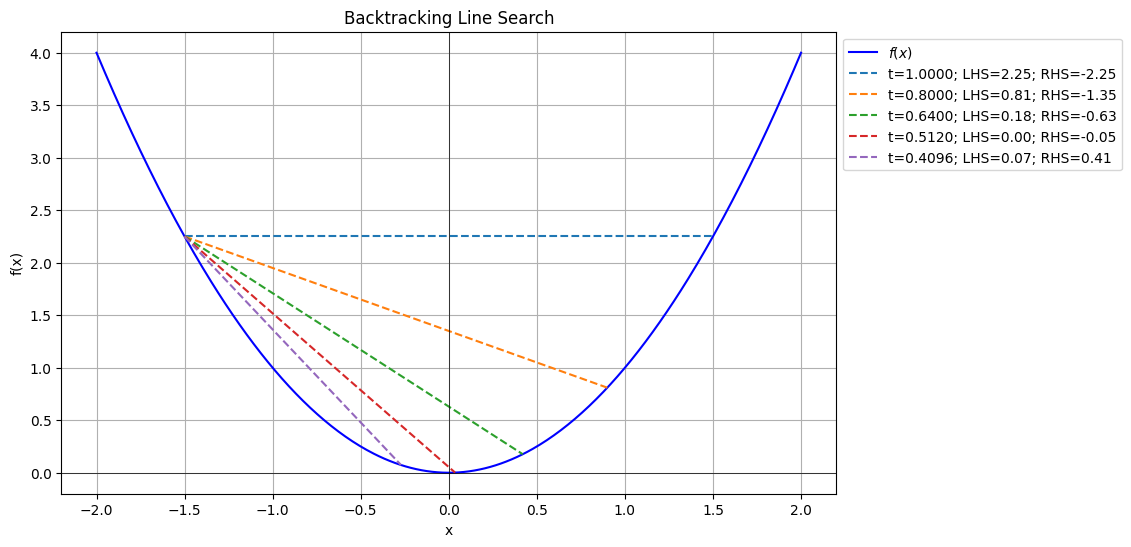

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
x_range = np.linspace(-2, 2, 400)
plt.plot(x_range, f(x_range), label=r'$f(x)$', color='blue')

fx0 = f(x)

for i in range(len(tvals)):
    t = tvals[i]
    fend = fvals[i]
    xend = xvals[i]
    xx = [x, xend]
    yy = [fx0,fend]
    plt.plot(xx,yy,'--', label=f't={t:.04f}; LHS={fend:.2f}; RHS={reductions[i]:.2f}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Backtracking Line Search')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(bbox_to_anchor = (1,1))
plt.grid(True)
plt.show()

In [12]:
tvals

[1.0, 0.8, 0.6400000000000001, 0.5120000000000001, 0.40960000000000013]

In [13]:
check_backtracking_condition(tvals[-1], alpha_2, x, f, grad_f)

Backtracking terminated.
LHS = 0.0735; RHS = 0.4068.


In [14]:
f(x - tvals[-1] * grad_f(x))

0.07354943999999981

In [15]:
f(x) - alpha_2 * tvals[-1] * grad_f(x)**2

0.4067999999999994

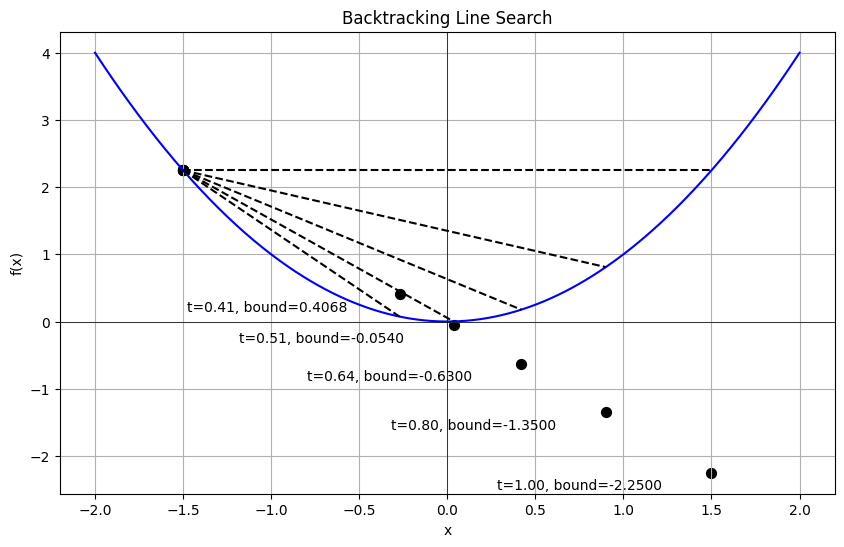

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
x_range = np.linspace(-2, 2, 400)
plt.plot(x_range, f(x_range), label=r'$f(x)$', color='blue')

fx0 = f(x)

for i in range(len(tvals)):
    t = tvals[i]
    fend = fvals[i]
    xend = xvals[i]
    xx = [x, xend]
    yy = [fx0,fend]
    needed_reductions = [fx0, reductions[i]]
    plt.plot(xx,yy,'--', color='black')
    plt.scatter(xx, needed_reductions, s=50, color='black', marker = 'o')
    plt.text(xend-.75, reductions[i] - 0.25, f't={t:.2f}, bound={reductions[i]:.4f}', fontsize=10, ha='center')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Backtracking Line Search')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()

# Note

To perform backtracking in practice, we only initialize the required hyperparameters and store their values. The values of the condition (inequality) or the actual function values are not stored. Only $t$ needs to be stored. The following example just stores the previous values. This could be further optimized to delete intermediate objects from memory once they are used. 

In [17]:
x = -1.5
t = 1.0

alpha_1 = 0.8
alpha_2 = 0.5

while f(x - t * grad_f(x)) > f(x) - alpha_2 * t * grad_f(x)**2:
    t *= alpha_1

In [18]:
t

0.40960000000000013

# Effects of $\alpha_1$ and $\alpha_2$

In [19]:
def do_backtracking_with_history(t, alpha_1, alpha_2, x, f, df):
    fval = f(x)
    dfval = df(x)
    fval_new = f(x - t*dfval)
    tvals = []
    fvals = []
    xvals = []
    reductions = []
    # Append initial values
    tvals.append(t)
    fvals.append(fval_new)
    xvals.append(x - t * dfval)
    reductions.append(f(x) - alpha_2 * t * df(x)**2)
    while f(x - t * df(x)) > f(x) - alpha_2 * t * df(x)**2:
        t *= alpha_1
        fval_new = f(x - t * df(x))
        tvals.append(t)
        fvals.append(fval_new)
        xvals.append(x - t * dfval)
        reductions.append(f(x) - alpha_2 * t * df(x)**2)
    return tvals, xvals, fvals, reductions

In [20]:
x = -1.5
t = 1.0
alpha_1 = 0.95
alpha_2 = 0.5

tvals, xvals, fvals, reductions = do_backtracking_with_history(t, alpha_1, alpha_2, x, f, grad_f)

In [21]:
check_backtracking_condition(tvals[-1], alpha_2, x, f, grad_f)

Backtracking terminated.
LHS = 0.0014; RHS = 0.0555.


## Plot line search

In [22]:
def plot_line_search(tvals, xvals, fvals, reductions, shift=0.55, annotate=True):
    plt.figure(figsize=(10, 6))
    x_range = np.linspace(-2, 2, 100)
    plt.plot(x_range, f(x_range), label=r'$f(x)$', color='darkblue')
    
    fx0 = f(x)
    
    for i in range(len(tvals)):
        shift *= -1
        t = tvals[i]
        fend = fvals[i]
        xend = xvals[i]
        xx = [x, xend]
        yy = [fx0,fend]
        needed_reductions = [fx0, reductions[i]]
        plt.plot(xx,yy,'--', color='black')
        plt.scatter(xx, needed_reductions, s=50, color='black', marker = 'o')
        if annotate:
            plt.text(xend + shift, reductions[i]-0.05, f't={t:.2f}, bound={reductions[i]:.4f}', fontsize=10, ha='center')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Backtracking Line Search')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.show()

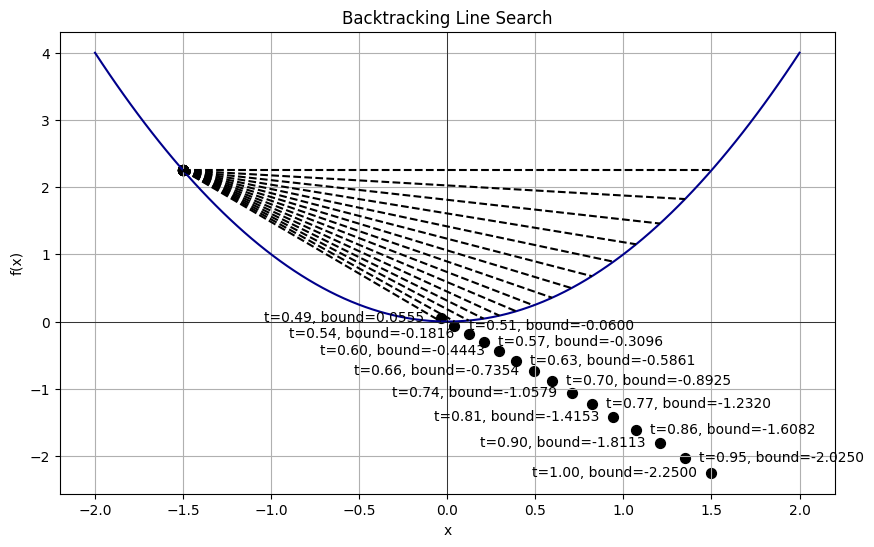

In [23]:
plot_line_search(tvals, xvals, fvals, reductions)

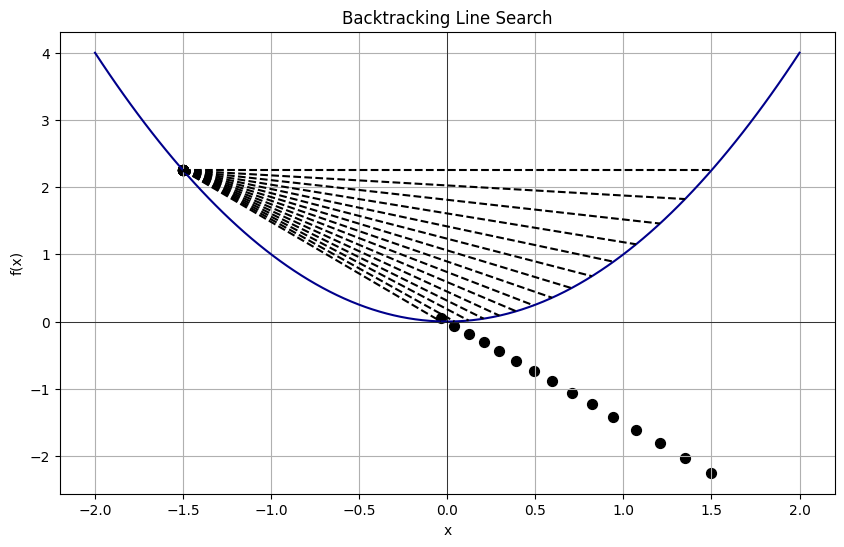

In [24]:
plot_line_search(tvals, xvals, fvals, reductions, annotate=False)

In [25]:
alphas_1 = [0.5, 0.75, 0.95]
alphas_2 = [0.25, 0.5, 0.75]
t = 1.0
x = -1.0

alpha_1 = 0.5; alpha_2 = 0.25.
Backtracking terminated.
LHS = 0.0000; RHS = 0.5000.
t = 0.5


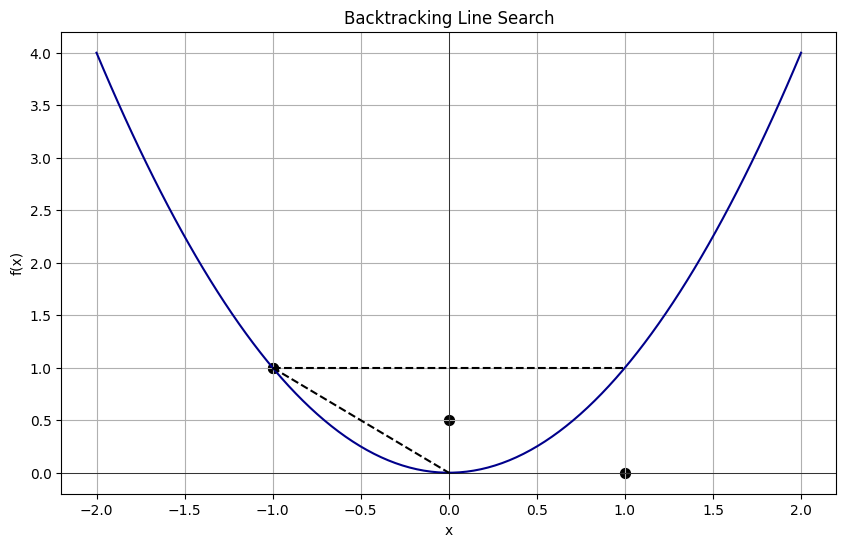

alpha_1 = 0.5; alpha_2 = 0.5.
Backtracking terminated.
LHS = 0.0000; RHS = 0.0000.
t = 0.5


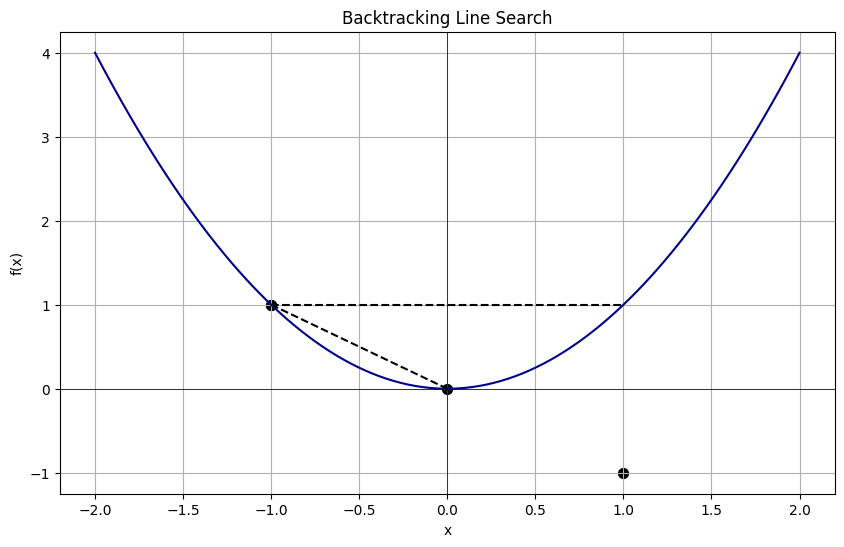

alpha_1 = 0.5; alpha_2 = 0.75.
Backtracking terminated.
LHS = 0.2500; RHS = 0.2500.
t = 0.25


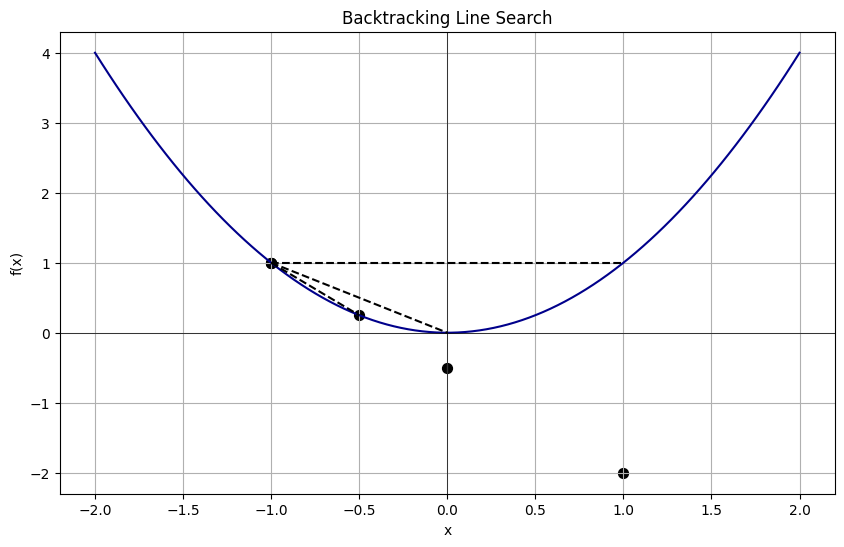

alpha_1 = 0.75; alpha_2 = 0.25.
Backtracking terminated.
LHS = 0.2500; RHS = 0.2500.
t = 0.75


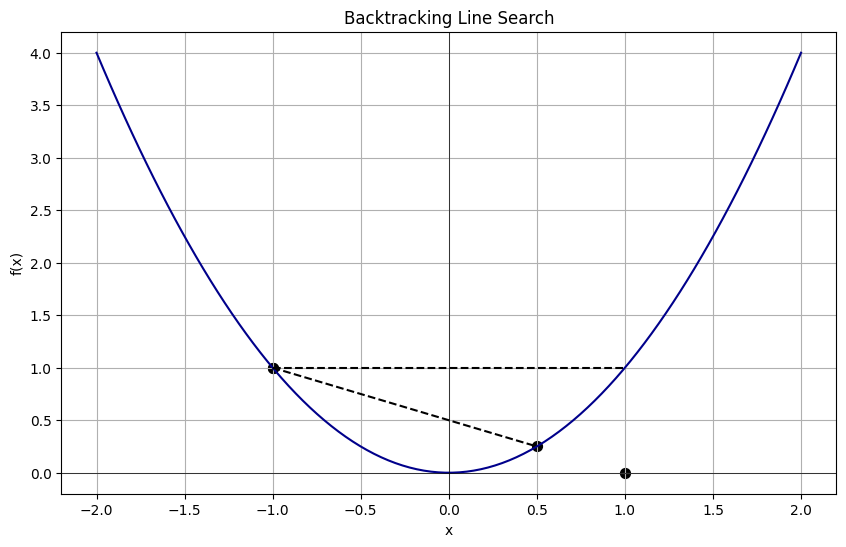

alpha_1 = 0.75; alpha_2 = 0.5.
Backtracking terminated.
LHS = 0.0244; RHS = 0.1562.
t = 0.421875


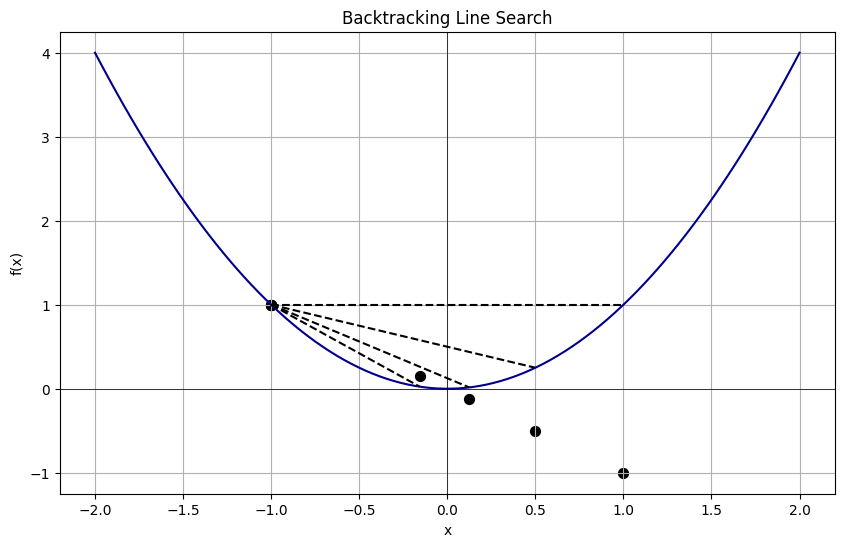

alpha_1 = 0.75; alpha_2 = 0.75.
Backtracking terminated.
LHS = 0.2760; RHS = 0.2881.
t = 0.2373046875


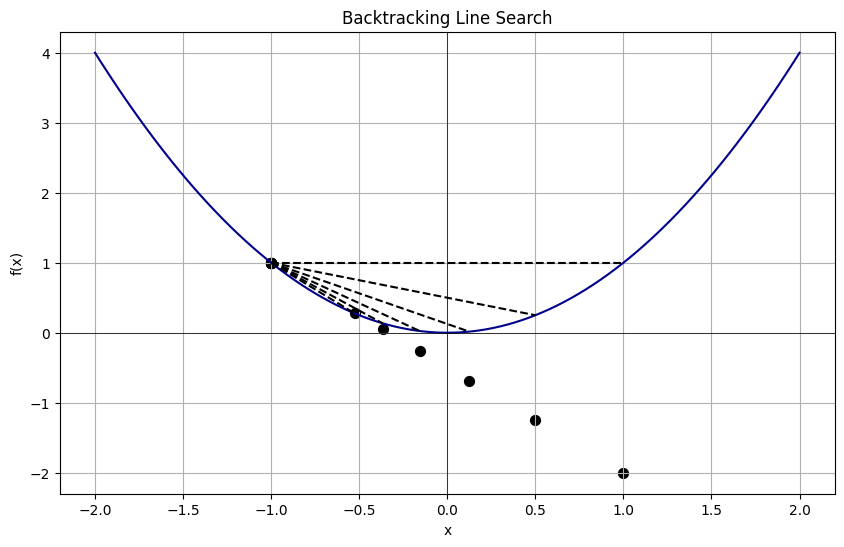

alpha_1 = 0.95; alpha_2 = 0.25.
Backtracking terminated.
LHS = 0.2211; RHS = 0.2649.
t = 0.7350918906249998


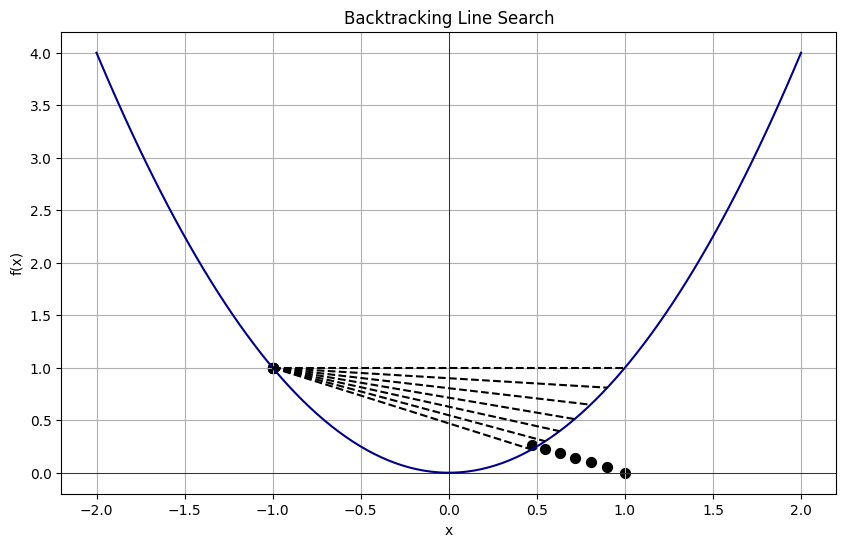

alpha_1 = 0.95; alpha_2 = 0.5.
Backtracking terminated.
LHS = 0.0006; RHS = 0.0247.
t = 0.48767497911552943


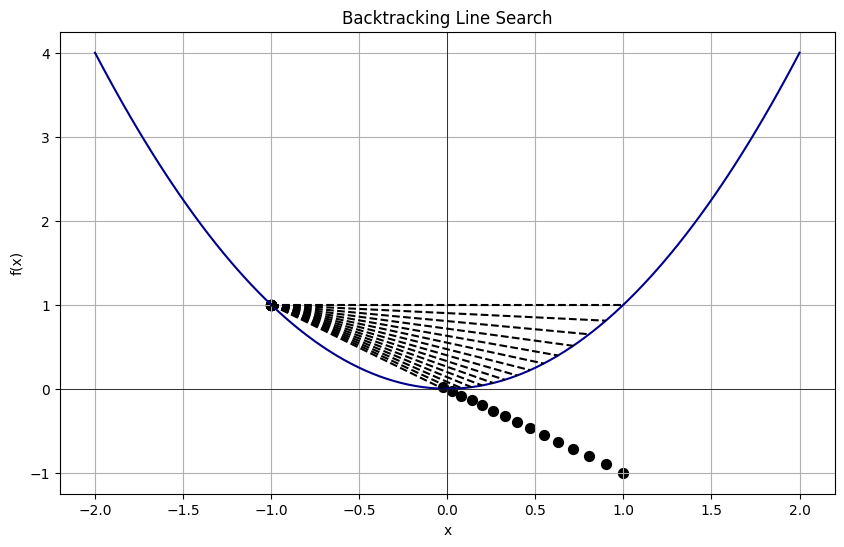

alpha_1 = 0.95; alpha_2 = 0.75.
Backtracking terminated.
LHS = 0.2749; RHS = 0.2865.
t = 0.2378268852553321


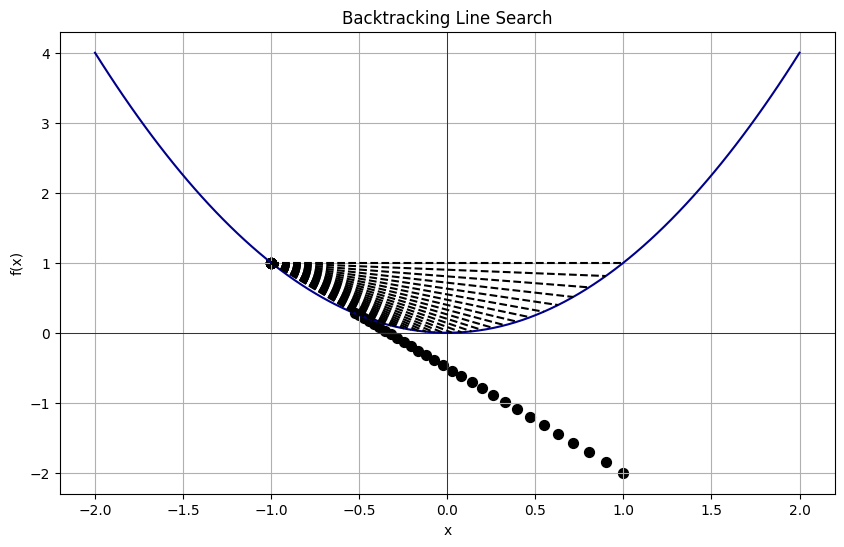

In [26]:
for alpha_1 in alphas_1:
    for alpha_2 in alphas_2:
        print(f'alpha_1 = {alpha_1}; alpha_2 = {alpha_2}.')
        tvals, xvals, fvals, reductions = do_backtracking_with_history(t, alpha_1, alpha_2, x, f, grad_f)
        check_backtracking_condition(tvals[-1], alpha_2, x, f, grad_f)
        print(f't = {tvals[-1]}')
        plot_line_search(tvals, xvals, fvals, reductions, annotate=False)
        t = 1.0

# One more example

In [27]:
def f(x):
    return np.exp(-0.5*(x-3.)) + np.exp(0.3*(x+3.))

def grad_f(x):
    return 0.3*np.exp(0.3*(x+3.)) - 0.5*np.exp(-0.5*(x-3.))

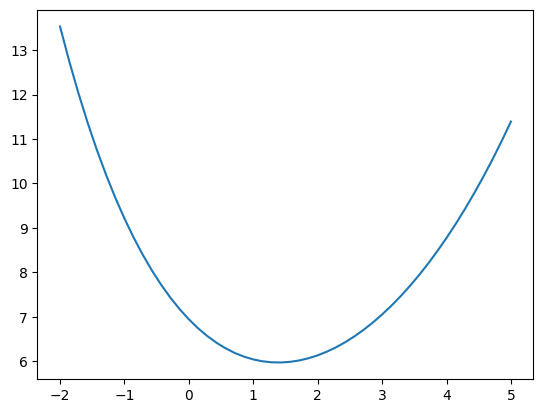

In [28]:
xx = np.linspace(-2.,5.,50)
plt.plot(xx, f(xx))

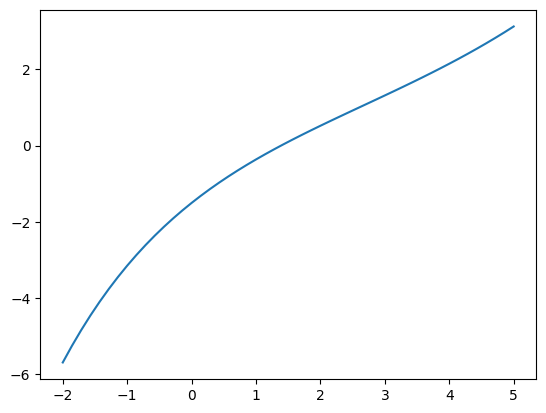

In [29]:
plt.plot(xx, grad_f(xx))

In [30]:
np.random.seed(54)
x = np.random.normal(size=1)[0]
print(x)

t = 1.0
alpha_1 = 0.8
alpha_2 = 0.5

-1.8522107446129081


In [31]:
tvals, xvals, fvals, reductions = do_backtracking_with_history(t, alpha_1, alpha_2, x, f, grad_f)

In [32]:
check_backtracking_condition(tvals[-1], alpha_2, x, f, grad_f)

Backtracking terminated.
LHS = 6.5581; RHS = 7.1152.


In [33]:
tvals[-1]

0.40960000000000013

In [34]:
x_range = np.linspace(-2, 5, 100)

In [35]:
def plot_line_search(x_range, f, tvals, xvals, fvals, reductions, shift=0.55, annotate=True):
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, f(x_range), label=r'$f(x)$', color='darkblue')
    
    fx0 = f(x)
    
    for i in range(len(tvals)):
        shift *= -1
        t = tvals[i]
        fend = fvals[i]
        xend = xvals[i]
        xx = [x, xend]
        yy = [fx0,fend]
        needed_reductions = [fx0, reductions[i]]
        plt.plot(xx,yy,'--', color='black')
        plt.scatter(xx, needed_reductions, s=50, color='black', marker = 'o')
        if annotate:
            plt.text(xend + shift, reductions[i]-0.05, f't={t:.2f}, bound={reductions[i]:.4f}', fontsize=10, ha='center')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Backtracking Line Search')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.show()

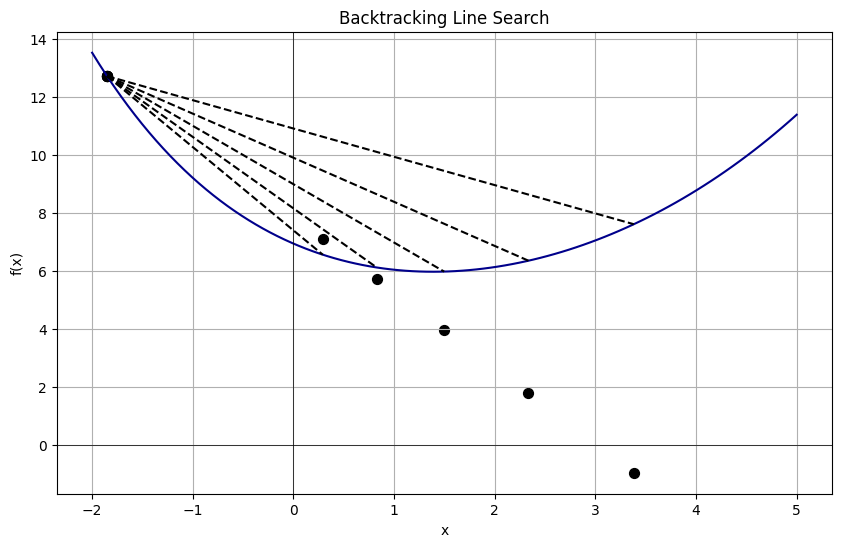

In [36]:
plot_line_search(x_range, f, tvals, xvals, fvals, reductions, annotate=False)

3.907283681671147
Backtracking terminated.
LHS = 6.0586; RHS = 6.4454.


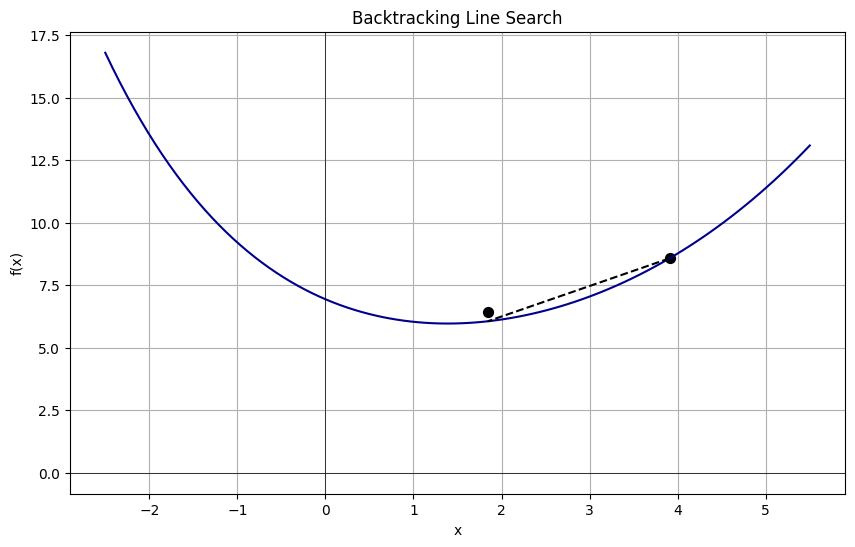

0.4750746476053198
Backtracking terminated.
LHS = 5.9837; RHS = 6.0347.


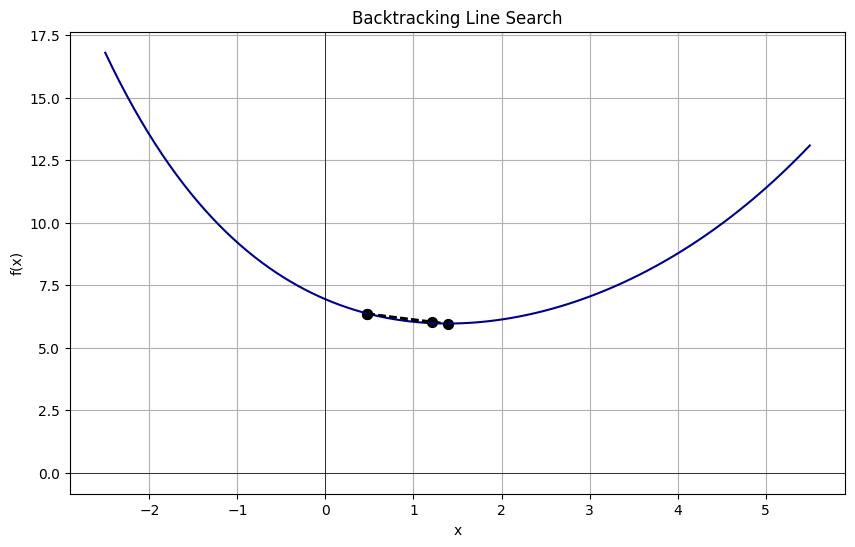

-4.981721120467904
Backtracking terminated.
LHS = 14.0867; RHS = 15.8476.


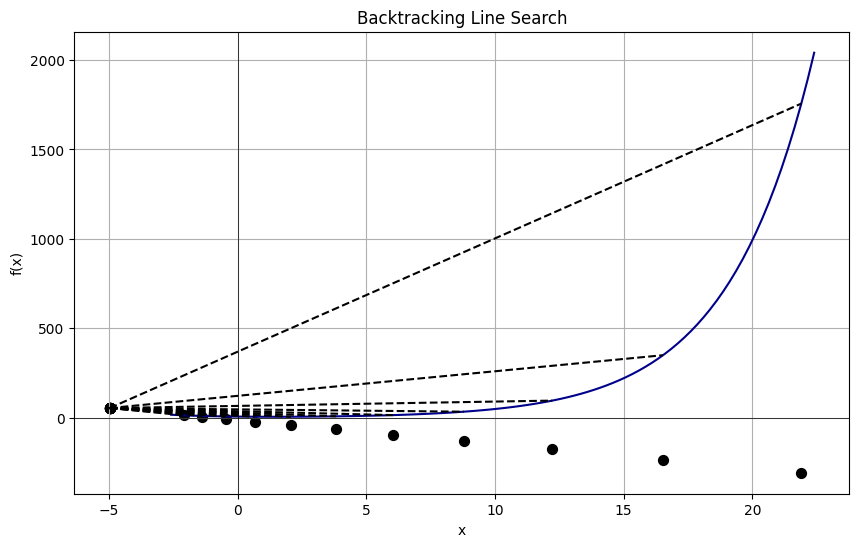

-0.32443041550913665
Backtracking terminated.
LHS = 6.0646; RHS = 6.2656.


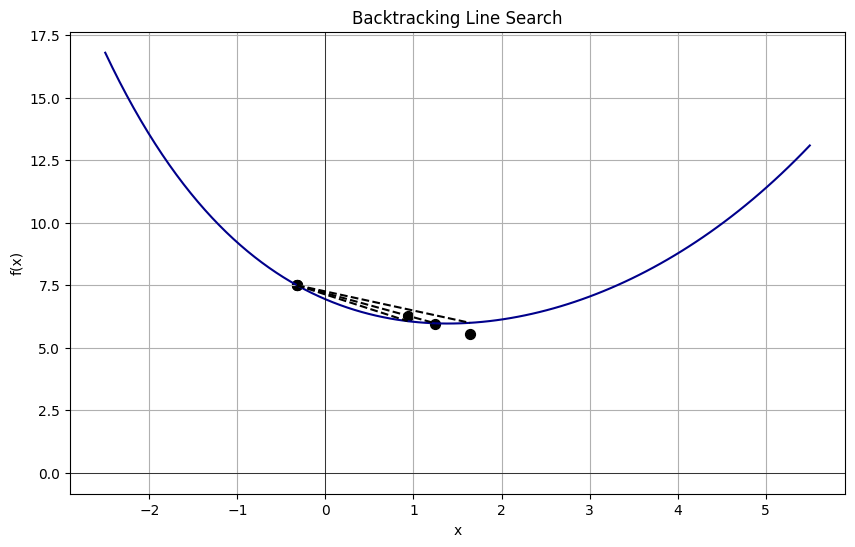

-0.5246916162032895
Backtracking terminated.
LHS = 6.0636; RHS = 6.2601.


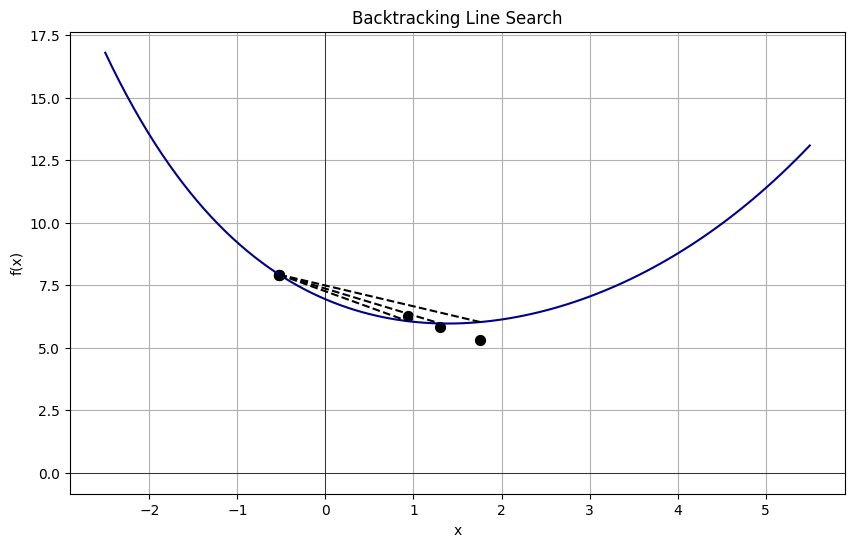

In [38]:
np.random.seed(67)
seeds = np.random.randint(3, 7877, size = (5,))

alpha_1 = 0.8
alpha_2 = 0.5

for seed in seeds:
    np.random.seed(seed)
    x = np.random.normal(size=1, scale=3.)[0]
    print(x)
    t = 1.0
    tvals, xvals, fvals, reductions = do_backtracking_with_history(t, alpha_1, alpha_2, x, f, grad_f)
    check_backtracking_condition(tvals[-1], alpha_2, x, f, grad_f)
    xmin = np.min([min(xvals), -2.])
    xmax = np.max([max(xvals), 5.])
    x_range = np.linspace(xmin-0.5, xmax+0.5, 100)
    plot_line_search(x_range, f, tvals, xvals, fvals, reductions, annotate=False)

# Non-convex: Do we still ensure function decrease?

In [49]:
def f_non_convex(x):
    return x**2 + 2*np.sin(5*x)

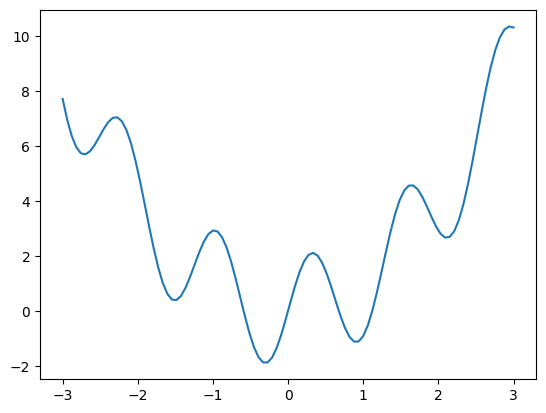

In [50]:
x_range = np.linspace(-3, 3, 100)
plt.plot(x_range,f_non_convex(x_range))

In [51]:
def df_non_convex(x):
    return 2*x + 10*np.cos(x)

4.617324840209599
Backtracking terminated.
LHS = 1.1684; RHS = 5.4822.


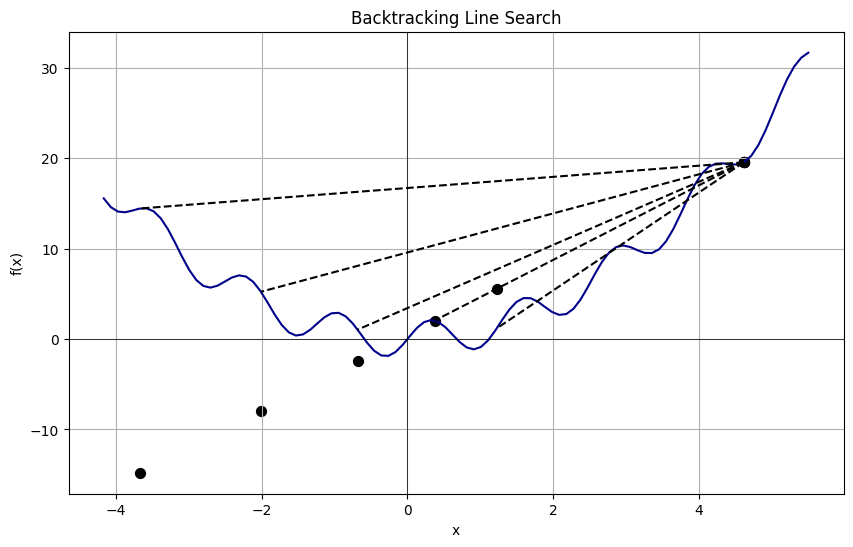

1.280280197816396
Backtracking terminated.
LHS = -0.1938; RHS = 0.2949.


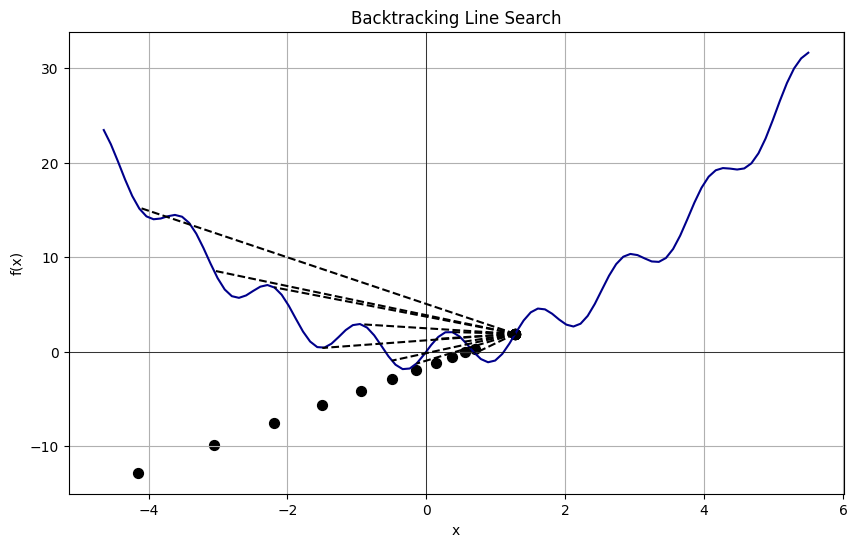

-10.184172358402908
Backtracking terminated.
LHS = 19.2209; RHS = 22.5012.


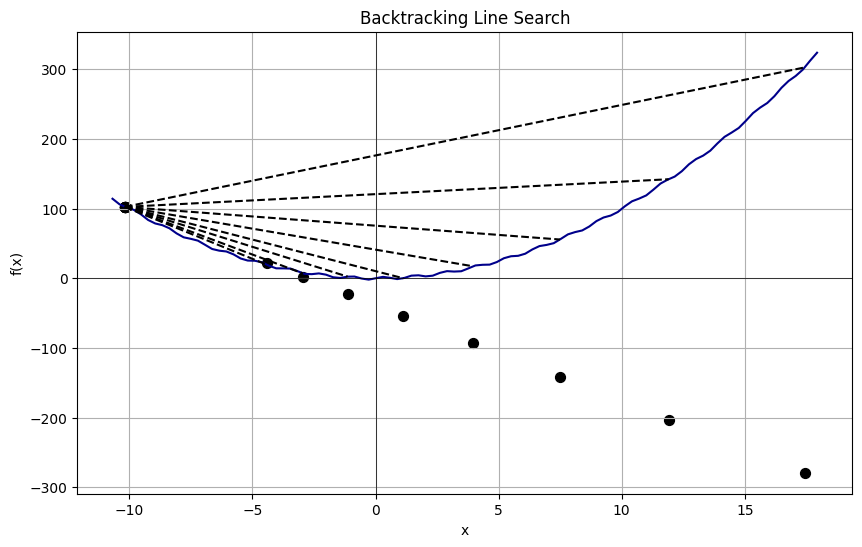

-4.736721799235922
Backtracking terminated.
LHS = -0.1087; RHS = 2.6117.


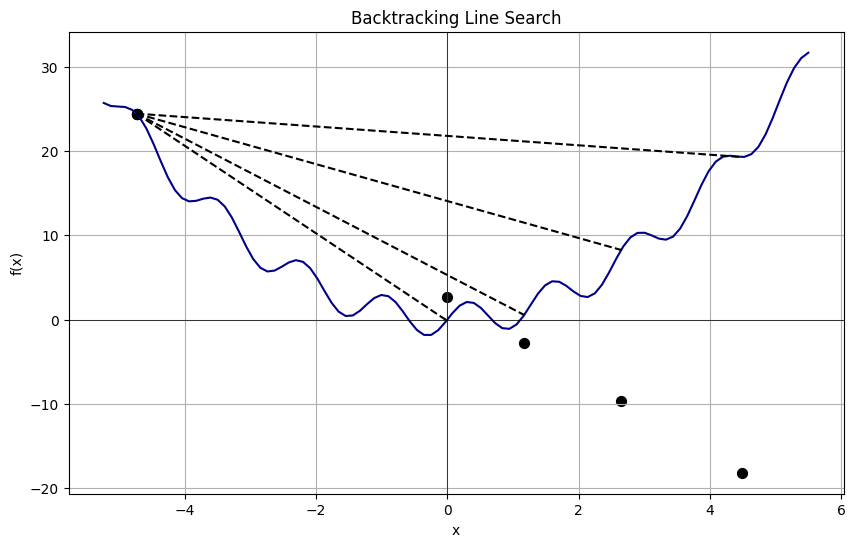

-0.3861443224884365
Backtracking terminated.
LHS = -1.7227; RHS = -1.7227.


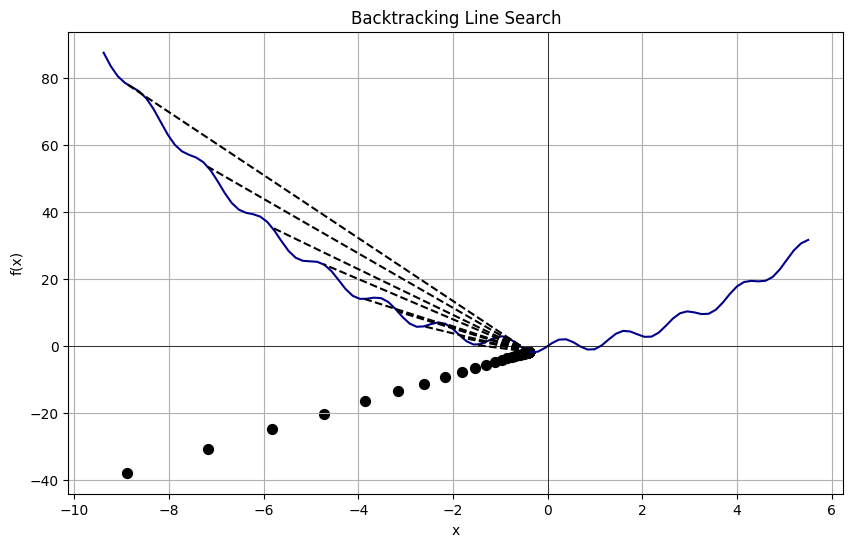

In [52]:
np.random.seed(89)
seeds = np.random.randint(3, 7877, size = (5,))

alpha_1 = 0.8
alpha_2 = 0.5

for seed in seeds:
    np.random.seed(seed)
    x = np.random.normal(size=1, scale=7.)[0]
    print(x)
    t = 1.0
    tvals, xvals, fvals, reductions = do_backtracking_with_history(t, alpha_1, alpha_2, x, f_non_convex, df_non_convex)
    check_backtracking_condition(tvals[-1], alpha_2, x, f_non_convex, df_non_convex)
    xmin = np.min([min(xvals), -2., x])
    xmax = np.max([max(xvals), 5., x])
    x_range = np.linspace(xmin-0.5, xmax+0.5, 100)
    plot_line_search(x_range, f_non_convex, tvals, xvals, fvals, reductions, annotate=False)